In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df = pd.read_csv("website_wata.csv")
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [5]:
df.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


In [6]:
df.isnull().sum()

Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64

In [11]:
df.dropna(inplace=True)
df

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [25]:

df_encoded = pd.get_dummies(df, columns=['Traffic Source'], drop_first=True)
df_encoded

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate,Traffic Source_Organic,Traffic Source_Paid,Traffic Source_Referral,Traffic Source_Social
0,5,11.051381,0.230652,3.890460,3,1.0,True,False,False,False
1,4,3.429316,0.391001,8.478174,0,1.0,False,False,False,True
2,4,1.621052,0.397986,9.636170,2,1.0,True,False,False,False
3,5,3.629279,0.180458,2.071925,3,1.0,True,False,False,False
4,5,4.235843,0.291541,1.960654,5,1.0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,1.324206,2,1.0,False,False,True,False
1996,3,0.392856,0.095559,3.824416,1,1.0,True,False,False,False
1997,4,9.899823,0.446622,1.288675,1,1.0,True,False,False,False
1998,3,0.393319,0.278340,5.037584,2,1.0,False,True,False,False


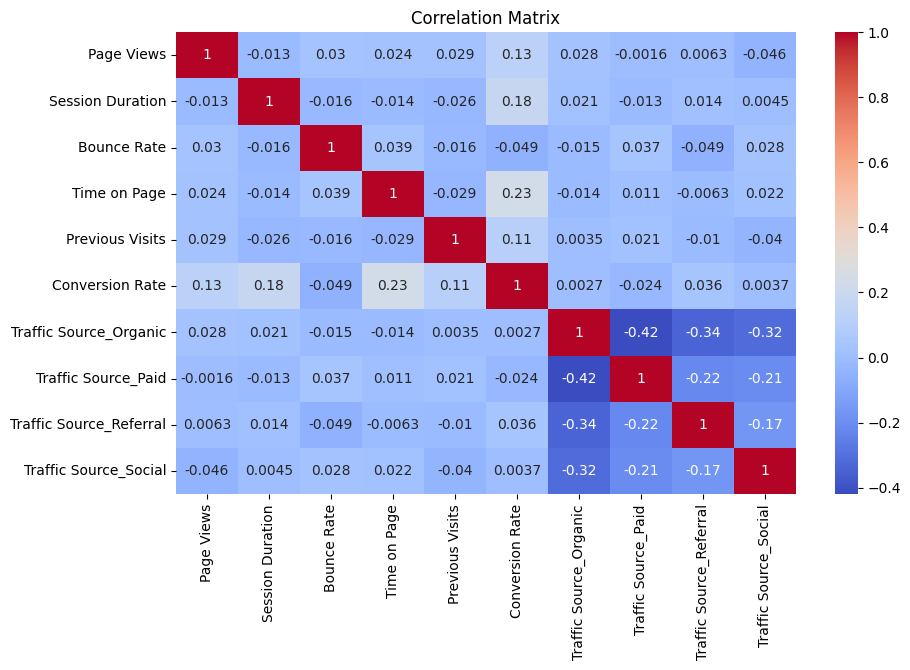

In [26]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
#Calculate the correlation between 'Page Views' and 'Conversion Rate'
correlation = df['Page Views'].corr(df['Conversion Rate'])
print(f"Correlation between Page Views and Conversion Rate: {correlation}")

Correlation between Page Views and Conversion Rate: 0.12663537260128024


In [29]:
# Prepare feature and target variables
X = df_encoded[['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits'] + [col for col in df_encoded.columns if 'Traffic Source_' in col]]
y = df_encoded['Conversion Rate']


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred_linear = linear_model.predict(X_test)

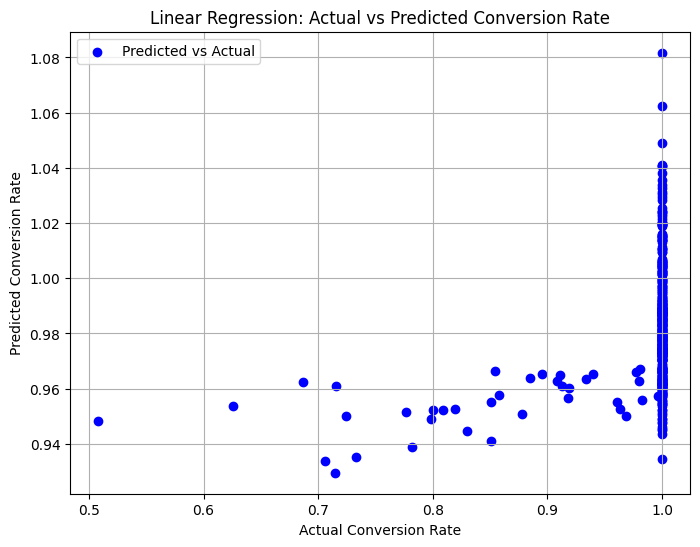

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Conversion Rate')
plt.ylabel('Predicted Conversion Rate')
plt.title('Linear Regression: Actual vs Predicted Conversion Rate')
plt.legend()
plt.grid()
plt.show()

In [36]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [37]:
y_pred_rf = rf_model.predict(X_test) 

In [38]:
print("Random Forest Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R-squared: {r2_score(y_test, y_pred_rf)}")

Random Forest Performance:
Mean Squared Error: 0.002470627756121523
R-squared: 0.20883299535692823


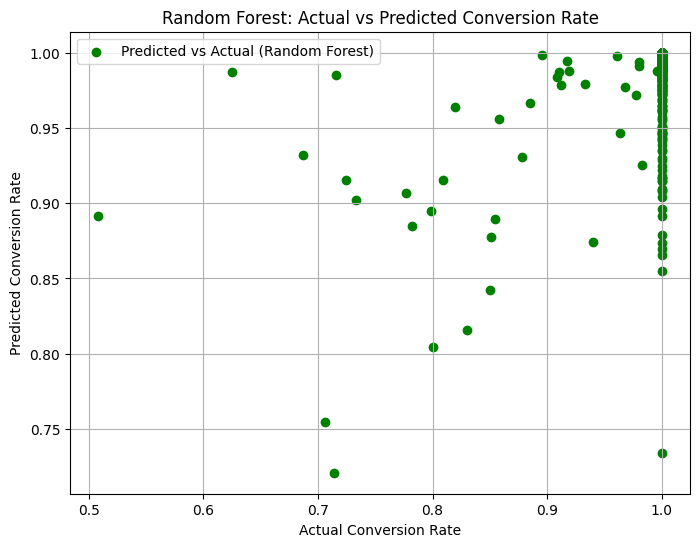

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predicted vs Actual (Random Forest)')
plt.xlabel('Actual Conversion Rate')
plt.ylabel('Predicted Conversion Rate')
plt.title('Random Forest: Actual vs Predicted Conversion Rate')
plt.legend()
plt.grid()
plt.show()